## Assignment 3
### Group Members: Yannick Heard, Timothy Lai, Christine Mulcahy, Daniel Quijano, Elena Reynolds

In [40]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math

scores = pd.read_csv('Assignment 3 Sentiment Scores.csv')
scores.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [2]:
models = scores.columns.tolist()
models

['ES', 'LS', 'RX', 'A8', 'A6', '3series', '5series', '7series', 'XJ', 'Sclass']

In [3]:
edge_list = []

def get_edges():
    for model1 in models:
        for model2 in models[models.index(model1)+1:]:
            pos_sent = []
            neg_sent = []
            for i in range(0,len(scores)):
                sent_model1 = scores[model1][i]
                sent_model2 = scores[model2][i]
                if (not(np.isnan(sent_model1)) & (not(np.isnan(sent_model2)))):
                    edge_weight = sent_model1 - sent_model2
                    if edge_weight >= 0:
                        pos_sent.append(edge_weight)
                    elif edge_weight < 0:
                        neg_sent.append(edge_weight)
            if len(pos_sent) > 0:
                edge_list.append([model1, model2, np.mean(pos_sent)])
            if len(neg_sent) > 0:
                edge_list.append([model2, model1, abs(np.mean(neg_sent))])
    return edge_list

get_edges()

[['ES', 'LS', 0.30434782608695654],
 ['LS', 'ES', 2.0],
 ['ES', 'RX', 0.83333333333333337],
 ['RX', 'ES', 2.0],
 ['ES', 'A8', 2.8333333333333335],
 ['A8', 'ES', 3.0],
 ['ES', 'A6', 6.0],
 ['A6', 'ES', 1.6666666666666667],
 ['ES', '3series', 3.25],
 ['3series', 'ES', 6.0],
 ['ES', '5series', 4.0],
 ['5series', 'ES', 5.0],
 ['ES', '7series', 3.0],
 ['7series', 'ES', 2.7999999999999998],
 ['ES', 'XJ', 0.5],
 ['XJ', 'ES', 1.0],
 ['ES', 'Sclass', 3.2857142857142856],
 ['Sclass', 'ES', 2.6153846153846154],
 ['LS', 'RX', 1.0],
 ['RX', 'LS', 1.1428571428571428],
 ['LS', 'A8', 2.3529411764705883],
 ['A8', 'LS', 2.8378378378378377],
 ['LS', 'A6', 2.7272727272727271],
 ['A6', 'LS', 1.2857142857142858],
 ['LS', '3series', 2.3333333333333335],
 ['3series', 'LS', 4.0],
 ['LS', '5series', 2.4545454545454546],
 ['5series', 'LS', 3.1000000000000001],
 ['LS', '7series', 2.1142857142857143],
 ['7series', 'LS', 2.75],
 ['LS', 'XJ', 2.0],
 ['XJ', 'LS', 2.8888888888888888],
 ['LS', 'Sclass', 2.1477272727272

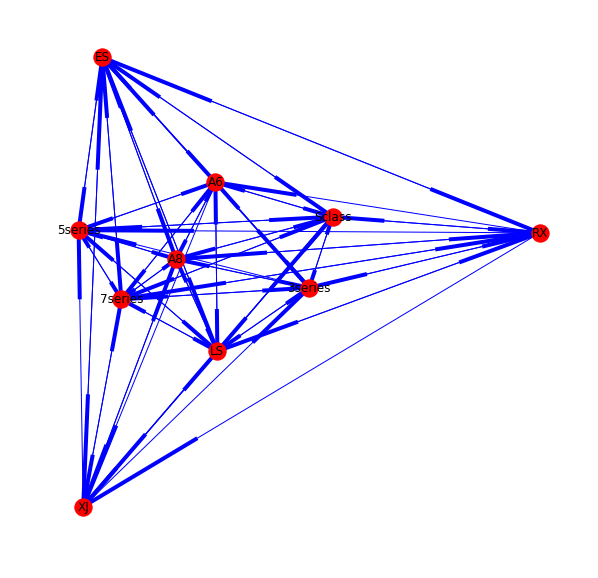

In [26]:
G = nx.DiGraph()
G.add_weighted_edges_from(edge_list)

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodesize=20)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color = 'b', arrows=True)
plt.axis('off')
plt.show()

### Part (b)

In [27]:
page_rank_unweighted = nx.pagerank(G, alpha = 0.99, weight = 1)
page_rank_unweighted

{'3series': 0.09315393834610573,
 '5series': 0.10468175461478667,
 '7series': 0.10986869703854982,
 'A6': 0.0982533295721719,
 'A8': 0.10986869703854985,
 'ES': 0.10986869703854983,
 'LS': 0.10986869703854982,
 'RX': 0.07295573223238781,
 'Sclass': 0.10986869703854982,
 'XJ': 0.08161176004179858}

In [36]:
page_rank_weighted = nx.pagerank(G, alpha = 0.99)
page_rank_weighted

{'3series': 0.10735667075588687,
 '5series': 0.098209925633999079,
 '7series': 0.071673100210594323,
 'A6': 0.13625204213015285,
 'A8': 0.14893030745926053,
 'ES': 0.14212528644935021,
 'LS': 0.11277502731113064,
 'RX': 0.050368637316756081,
 'Sclass': 0.080150282429632375,
 'XJ': 0.052158720303237205}

In [50]:
partb_df1 = pd.DataFrame.from_dict(page_rank_unweighted, orient = 'index')
partb_df2 = pd.DataFrame.from_dict(page_rank_weighted, orient = 'index')
partb_df1.columns = ['Page Rank Unweighted']
partb_df2.columns = ['Page Rank Weighted']
partb_df1 = partb_df1.sort_index()
partb_df2 = partb_df2.sort_index()

partb_df = pd.concat([partb_df1,partb_df2], axis=1)
partb_df['Sales'] = [220000, 60000, 14000, 20000, 12000, 135000, 30000, 120000, 25000, 6600]
partb_df.sort_values('Sales', ascending=False)

,Page Rank Unweighted,Page Rank Weighted,Sales
3series,0.093154,0.107357,220000
ES,0.109869,0.142125,135000
RX,0.072956,0.050369,120000
5series,0.104682,0.098210,60000
LS,0.109869,0.112775,30000
Sclass,0.109869,0.080150,25000
A6,0.098253,0.136252,20000
7series,0.109869,0.071673,14000
A8,0.109869,0.148930,12000
XJ,0.081612,0.052159,6600


In [45]:
partb_df['Page Rank Unweighted'].corr(partb_df['Sales'])

-0.28944274294681338

In [46]:
partb_df['Page Rank Weighted'].corr(partb_df['Sales'])

0.074980268832453636

### Part (c)

In [51]:
ed = pd.read_excel('Edmunds Reviews.xlsx', sheetname = 0)
ed = ed.append(pd.read_excel('Edmunds Reviews.xlsx', sheetname = 1))
ed = ed.append(pd.read_excel('Edmunds Reviews.xlsx', sheetname = 2))
ed = ed.append(pd.read_excel('Edmunds Reviews.xlsx', sheetname = 3))
ed = ed.append(pd.read_excel('Edmunds Reviews.xlsx', sheetname = 4))
ed = ed.append(pd.read_excel('Edmunds Reviews.xlsx', sheetname = 5))
len(ed)

1308